In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import tensorflow
from bs4 import BeautifulSoup
import en_core_web_sm
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import spacy
import nltk
import re
from string import punctuation
#import nltk
nltk.download('punkt')
nltk.download('all') 
from nltk.corpus import stopwords
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

C:\Users\Houda\Anaconda3\envs\MyEnvironmentName\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger 

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Dow

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Houda\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\U

In [ ]:
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 128.2/128.2 KB 1.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1277 sha256=541562bf0aa6a0d173f791cf9aaaa77cb9415d2c049fe1b0cb1e69d6fb2160ee
  Stored in directory: c:\users\houda\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [ ]:
!pip install gensim

     --------------------------------------- 24.0/24.0 MB 14.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)


In [ ]:
import tensorflow_core

# Contexte

# Importation et nettoyage des données

In [ ]:
data = pd.read_csv('C:/Users/Houda/Documents/OpenClassrooms/P5/QueryResults.csv', sep=',')

In [ ]:
data.head()

,Title,Body,Unnamed: 2,Id,Score,ViewCount,FavoriteCount,CreationDate,AnswerCount
0,Proper way to use CollectionViewSource in View...,<p>I used Drag and Drop to bind Data Source ob...,c# wpf mvvm datagrid collectionviewsource,20888619,59,92137,25,2014-01-02 17:45:21,3
1,spring boot rest and angular2 with websocket (...,<p>Is it possible to use stomp over sockjs wit...,spring tomcat angular stomp sockjs,36238816,6,7343,1,2016-03-26 17:59:58,3
2,knex.js + pg specify varchar to be > 255,"<p>When creating a table in knex migrations, I...",string postgresql knex.js varchar postgresql-9.4,35817959,14,12871,1,2016-03-05 18:23:19,2
3,"An amnesia patient's ""first"" functional langua...",<p>I was recently diagnosed with a cascading d...,database functional-programming clojure webser...,284518,20,1573,5,2008-11-12 16:33:17,5
4,How to check pom.xml for updated dependencies,<p>I am fairly new to Maven and pom.xml. Is th...,maven maven-2 maven-3 maven-plugin dependency-...,3516538,58,25702,16,2010-08-18 20:46:15,3


In [ ]:
data.rename(columns={data.columns[2]: 'Tags'}, inplace = True)

In [ ]:
data.shape

(50000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          50000 non-null  object
 1   Body           50000 non-null  object
 2   Tags           50000 non-null  object
 3   Id             50000 non-null  int64 
 4   Score          50000 non-null  int64 
 5   ViewCount      50000 non-null  int64 
 6   FavoriteCount  50000 non-null  int64 
 7   CreationDate   50000 non-null  object
 8   AnswerCount    50000 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.4+ MB


In [ ]:
data.describe()

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,1.661853e+07,39.634560,3.709158e+04,13.977400,4.242060
std,1.760694e+07,214.140929,1.423853e+05,90.963668,4.378608
min,4.000000e+00,6.000000,1.010000e+02,1.000000,1.000000
25%,2.706029e+06,8.000000,3.958750e+03,2.000000,2.000000
50%,8.389330e+06,12.000000,1.022600e+04,4.000000,3.000000
75%,2.429261e+07,24.000000,2.714900e+04,8.000000,5.000000
max,7.141803e+07,18993.000000,9.735081e+06,6726.000000,123.000000


In [ ]:
data.set_index('Id', inplace=True)

In [ ]:
data[data.duplicated(['Title', 'Body', 'Tags'])]

,Title,Body,Tags,Score,ViewCount,FavoriteCount,CreationDate,AnswerCount
Id,,,,,,,,


##  Analyse des Tags

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_vec = vectorizer.fit_transform(data['Tags'])

In [ ]:
tags = vectorizer.get_feature_names()
freqs = tag_vec.sum(axis=0).A1
result = dict(zip(tags, freqs))
tag_data = pd.DataFrame(list(result.items()), columns =['Tags', 'Counts'])
tag_data

C:\Users\Houda\Anaconda3\envs\MyEnvironmentName\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Tags,Counts
0,.a,1
1,.app,1
2,.bash-profile,2
3,.class-file,1
4,.doc,2
...,...,...
17734,zstandard,2
17735,zstd,1
17736,zune,1
17737,zurb-foundation,7


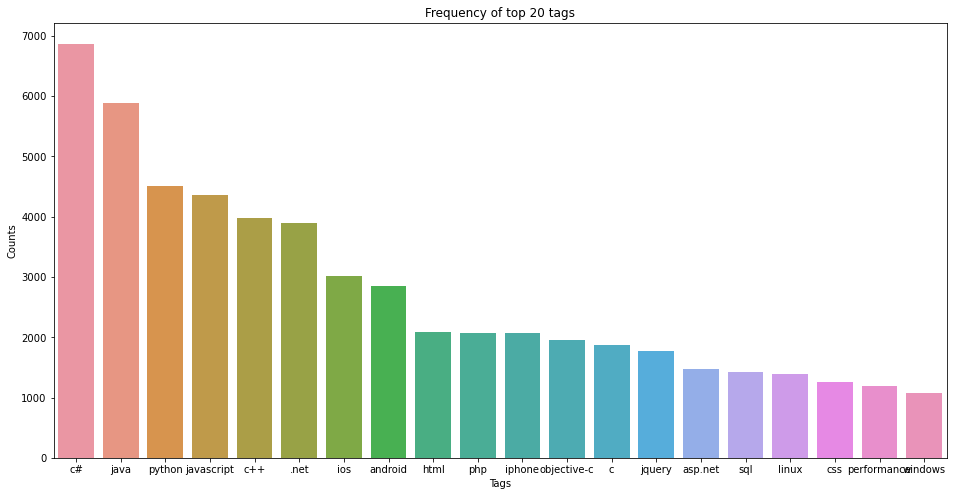

In [ ]:
tag_data_sorted = tag_data.sort_values(['Counts'], ascending=False)
tag_data_sorted.head(20)
plt.figure(figsize=(16,8)) 
sns.barplot(x="Tags", y="Counts", data=tag_data_sorted.head(20))
plt.title('Frequency of top 20 tags')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

## Nettoyage des questions

In [ ]:
def remove_code(x):
    #soup = BeautifulSoup(x,"lxml")
    soup = BeautifulSoup(x,"html.parser")
    code_to_remove = soup.findAll("code")
    for code in code_to_remove:
        code.replace_with(" ")
    return str(soup)

In [ ]:
import lxml
data['Body_1'] = data['Body'].apply(remove_code)
# Delete all html tags
data['Body_1'] = [BeautifulSoup(text,"html.parser").get_text() for text in data['Body_1']]
data[['Body','Body_1']].head()

,Body,Body_1
Id,,
20888619,<p>I used Drag and Drop to bind Data Source ob...,I used Drag and Drop to bind Data Source objec...
36238816,<p>Is it possible to use stomp over sockjs wit...,Is it possible to use stomp over sockjs withou...
35817959,"<p>When creating a table in knex migrations, I...","When creating a table in knex migrations, I ha..."
284518,<p>I was recently diagnosed with a cascading d...,I was recently diagnosed with a cascading diss...
3516538,<p>I am fairly new to Maven and pom.xml. Is th...,I am fairly new to Maven and pom.xml. Is there...


In [ ]:
#https://spacy.io/usage/linguistic-features
def remove_pos(nlp, x, pos_list):
    doc = nlp(x)
    list_text_row = []
    for token in doc:
        if(token.pos_ in pos_list):
            list_text_row.append(token.text)
    join_text_row = " ".join(list_text_row)
    join_text_row = join_text_row.lower().replace("c #", "c#")
    return join_text_row

In [ ]:
def clean_text_1(x):
    # Remove POS not in "NOUN", "PROPN", "VERB"
    x = remove_pos(nlp, x, pos_list)
    return x

In [ ]:
nlp = spacy.load('en_core_web_sm')
pos_list = ["NOUN","PROPN", "VERB"]
data['Body_clean'] = data['Body_1'].apply(lambda x: clean_text_1(x))
data[['Body_1','Body_clean']].head()

,Body_1,Body_clean
Id,,
20888619,I used Drag and Drop to bind Data Source objec...,used drag drop bind data source object db mode...
36238816,Is it possible to use stomp over sockjs withou...,use stomp sockjs mvc like have spring rest int...
35817959,"When creating a table in knex migrations, I ha...",creating table knex migrations indicated col d...
284518,I was recently diagnosed with a cascading diss...,diagnosed cascading disorder retrograde amnesi...
3516538,I am fairly new to Maven and pom.xml. Is there...,maven pom.xml way find dependencies outdated u...


In [ ]:
def clean_text_2(x):
    # Case normalization
    x = x.lower()
    # Remove unicode characters
    x = x.encode("ascii", "ignore").decode()
    # Remove English contractions
    x = re.sub("\'\w+", '', x)
    # Remove ponctuation but not # (for C# for example)
    x = re.sub('[^\\w\\s#]', '', x)
    # Remove links
    x = re.sub(r'http*\S+', '', x)
    # Remove numbers
    x = re.sub(r'\w*\d+\w*', '', x)
    # Remove extra spaces
    x = re.sub('\s+', ' ', x)
    x = re.sub(r"\'\n", " ", x)
    x = re.sub(r"\'\xa0", " ", x)
    return x

In [ ]:
data['Body_2'] = data['Body_clean'].apply(lambda x: clean_text_2(x))
data[['Body_clean', 'Body_2']].head()

,Body_clean,Body_2
Id,,
20888619,used drag drop bind data source object db mode...,used drag drop bind data source object db mode...
36238816,use stomp sockjs mvc like have spring rest int...,use stomp sockjs mvc like have spring rest int...
35817959,creating table knex migrations indicated col d...,creating table knex migrations indicated col d...
284518,diagnosed cascading disorder retrograde amnesi...,diagnosed cascading disorder retrograde amnesi...
3516538,maven pom.xml way find dependencies outdated u...,maven pomxml way find dependencies outdated up...


In [ ]:
token=ToktokTokenizer()
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [ ]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [ ]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in data['Tags']:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [ ]:
data['Body_3'] = data['Body_2'].apply(lambda x: clean_punct(x)) 
data[['Body_2', 'Body_3']].head(5)

,Body_2,Body_3
Id,,
20888619,used drag drop bind data source object db mode...,used drag drop bind data source object db mode...
36238816,use stomp sockjs mvc like have spring rest int...,use stomp sockjs mvc like have spring rest int...
35817959,creating table knex migrations indicated col d...,creating table knex migrations indicated col d...
284518,diagnosed cascading disorder retrograde amnesi...,diagnosed cascading disorder retrograde amnesi...
3516538,maven pomxml way find dependencies outdated up...,maven pomxml way find dependencies outdated up...


In [ ]:
def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [ ]:
data['Body_4'] = data['Body_3'].apply(lambda x: stopWordsRemove(x))
data[['Body_3', 'Body_4']].head()

,Body_3,Body_4
Id,,
20888619,used drag drop bind data source object db mode...,used drag drop bind data source object db mode...
36238816,use stomp sockjs mvc like have spring rest int...,use stomp sockjs mvc like spring rest interfac...
35817959,creating table knex migrations indicated col d...,creating table knex migrations indicated col d...
284518,diagnosed cascading disorder retrograde amnesi...,diagnosed cascading disorder retrograde amnesi...
3516538,maven pomxml way find dependencies outdated up...,maven pomxml way find dependencies outdated up...


In [ ]:
lemma=WordNetLemmatizer()
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

In [ ]:
data['Body_5'] = data['Body_4'].apply(lambda x: lemitizeWords(x))
data[['Body_4', 'Body_5']].head()

,Body_4,Body_5
Id,,
20888619,used drag drop bind data source object db mode...,use drag drop bind data source object db model...
36238816,use stomp sockjs mvc like spring rest interfac...,use stomp sockjs mvc like spring rest interfac...
35817959,creating table knex migrations indicated col d...,create table knex migrations indicate col defa...
284518,diagnosed cascading disorder retrograde amnesi...,diagnose cascade disorder retrograde amnesia a...
3516538,maven pomxml way find dependencies outdated up...,maven pomxml way find dependencies outdated up...


In [ ]:
data['Body_6'] = data.Body_5.apply(nltk.tokenize.word_tokenize)
data[['Body_5', 'Body_6']].head()

,Body_5,Body_6
Id,,
20888619,use drag drop bind data source object db model...,"[use, drag, drop, bind, data, source, object, ..."
36238816,use stomp sockjs mvc like spring rest interfac...,"[use, stomp, sockjs, mvc, like, spring, rest, ..."
35817959,create table knex migrations indicate col defa...,"[create, table, knex, migrations, indicate, co..."
284518,diagnose cascade disorder retrograde amnesia a...,"[diagnose, cascade, disorder, retrograde, amne..."
3516538,maven pomxml way find dependencies outdated up...,"[maven, pomxml, way, find, dependencies, outda..."


No handles with labels found to put in legend.


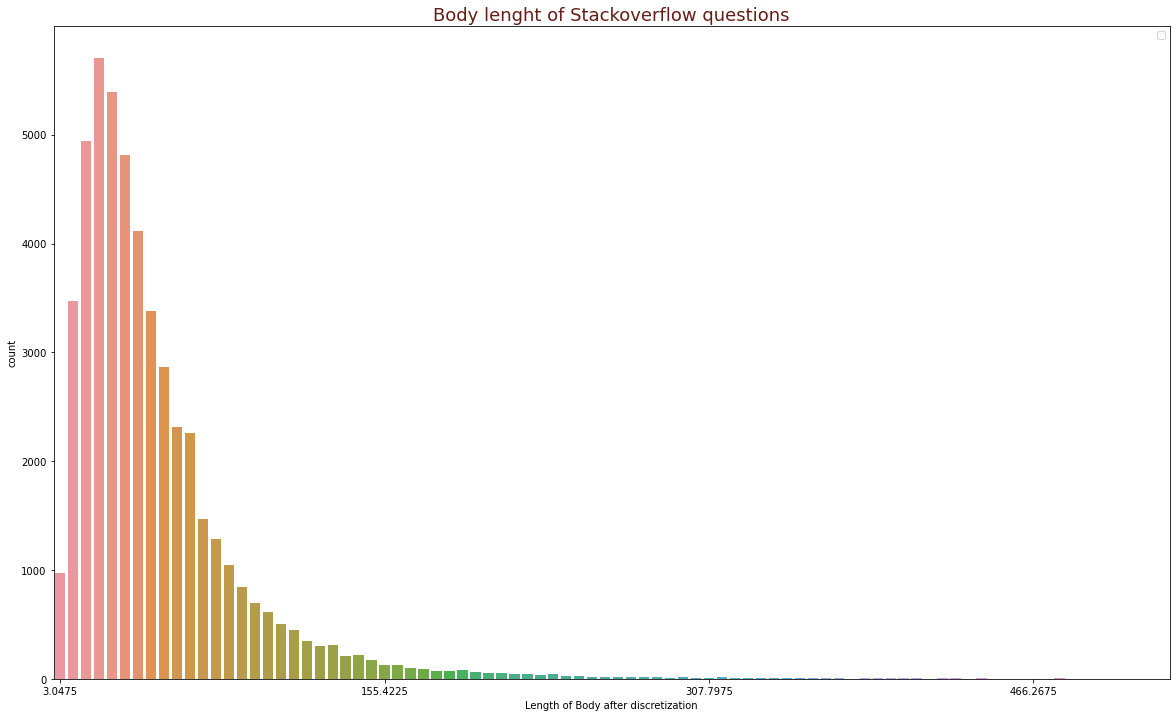

In [ ]:
# Discretizer for Body characters lenght
X = pd.DataFrame(data.Body_6.str.len())
# Sklearn discretizer with 200 bins
discretizer = KBinsDiscretizer(n_bins=200,
                               encode='ordinal',
                               strategy='uniform')
body_lenght = discretizer.fit_transform(X)
body_lenght = discretizer.inverse_transform(body_lenght)
body_lenght = pd.Series(body_lenght.reshape(-1))
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=body_lenght)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
ax.set_xlabel("Length of Body after discretization")
plt.title("Body lenght of Stackoverflow questions",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

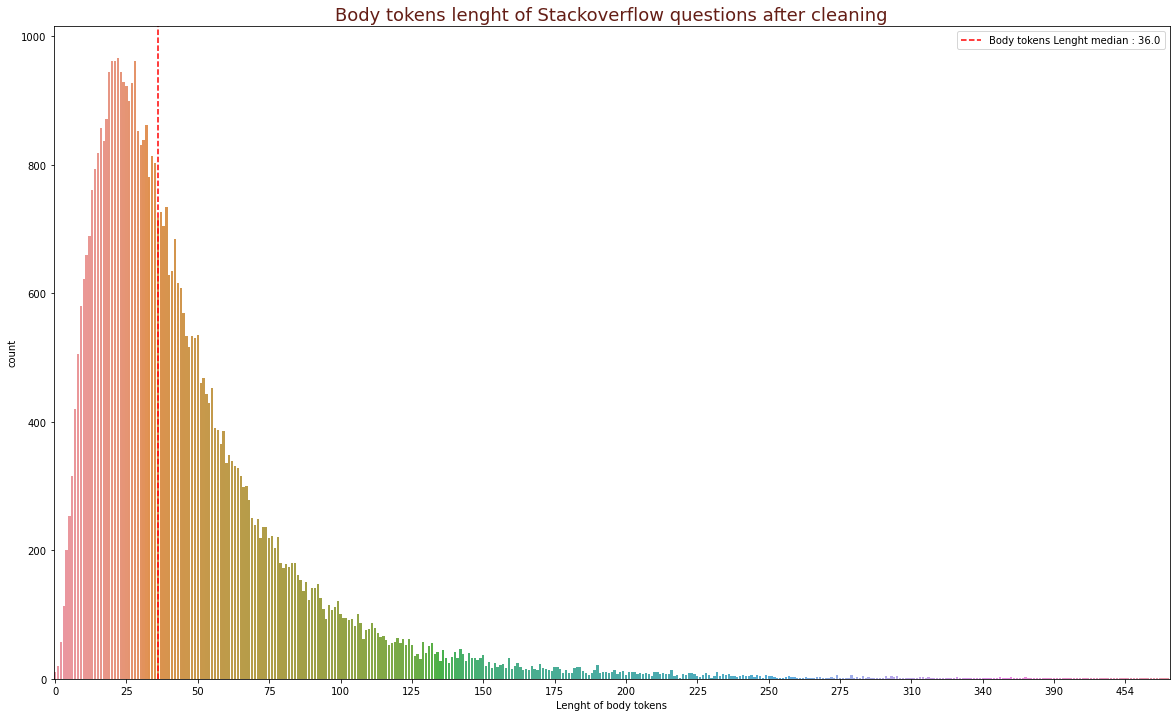

In [ ]:
# Calculate lenght of each list in Body
data['body_tokens_count'] = [len(_) for _ in data.Body_6]

# Countplot of body lenght
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.body_tokens_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 25))
plot_median = data.body_tokens_count.median()
plt.axvline(plot_median - data.body_tokens_count.min(),
            color="r", linestyle='--',
            label="Body tokens Lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of body tokens")
plt.title("Body tokens lenght of Stackoverflow questions after cleaning",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()

In [ ]:
full_corpus = []
for i in data['Body_6']:
    full_corpus.extend(i)

body_dist = nltk.FreqDist(full_corpus)
body_dist = pd.DataFrame(body_dist.most_common(5000),
                         columns=['Word', 'Frequency'])
body_dist

,Word,Frequency
0,use,62443
1,work,26043
2,code,25316
3,get,24264
4,try,23975
...,...,...
4995,mainwindow,20
4996,grok,20
4997,ghostscript,20
4998,autoincrement,20


In [ ]:
body_dist.describe()

,Frequency
count,5000.00000
mean,446.14580
std,1690.67124
min,20.00000
25%,34.00000
50%,72.00000
75%,239.00000
max,62443.00000


In [ ]:
body_dist

,Word,Frequency
0,use,62443
1,work,26043
2,code,25316
3,get,24264
4,try,23975
...,...,...
4995,mainwindow,20
4996,grok,20
4997,ghostscript,20
4998,autoincrement,20


## Nettoyage des titres

In [ ]:
data['Title_1'] = data['Title'].apply(lambda x: str(x))
data['Title_2'] = data['Title_1'].apply(lambda x: clean_text_1(x))
data['Title_3'] = data['Title_2'].apply(lambda x: clean_text_2(x)) 
data['Title_4'] = data['Title_3'].apply(lambda x: clean_punct(x)) 
data['Title_5'] = data['Title_4'].apply(lambda x: stopWordsRemove(x)) 
data['Title_6'] = data['Title_5'].apply(lambda x: lemitizeWords(x))  

In [ ]:
data['Title_7'] = data.Title_6.apply(nltk.tokenize.word_tokenize)

In [ ]:
data['Tags_list'] = data['Tags'].str.split()

In [ ]:
data_new = data[['Title_7', 'Body_6', 'Tags_list']]
data_new = data_new.rename(columns={
    'Title_7': 'Title',
    'Body_6': 'Body',
    'Tags_list': 'Tags'
})

In [ ]:
data_new['Question'] = data_new['Title'] + data_new["Body"]

In [ ]:
data_new.head()

,Title,Body,Tags,Question
Id,,,,
20888619,"[way, use, collectionviewsource, viewmodel]","[use, drag, drop, bind, data, source, object, ...","[c#, wpf, mvvm, datagrid, collectionviewsource]","[way, use, collectionviewsource, viewmodel, us..."
36238816,"[spring, boot, rest, websocket, stomp, sockjs]","[use, stomp, sockjs, mvc, like, spring, rest, ...","[spring, tomcat, angular, stomp, sockjs]","[spring, boot, rest, websocket, stomp, sockjs,..."
35817959,"[specify, varchar]","[create, table, knex, migrations, indicate, co...","[string, postgresql, knex.js, varchar, postgre...","[specify, varchar, create, table, knex, migrat..."
284518,"[amnesia, patient, language, like, clojure]","[diagnose, cascade, disorder, retrograde, amne...","[database, functional-programming, clojure, we...","[amnesia, patient, language, like, clojure, di..."
3516538,"[check, update, dependencies]","[maven, pomxml, way, find, dependencies, outda...","[maven, maven-2, maven-3, maven-plugin, depend...","[check, update, dependencies, maven, pomxml, w..."


In [ ]:
# Données nettoyées
data_new.to_csv('C:/Users/Houda/Documents/OpenClassrooms/P5/data_new.csv',quoting = csv.QUOTE_NONE, escapechar = ' ')